<a href="https://colab.research.google.com/github/mehrab-karim-antor/Machine_Learning/blob/main/(SGD%2C_RMSProp%2C_Adam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

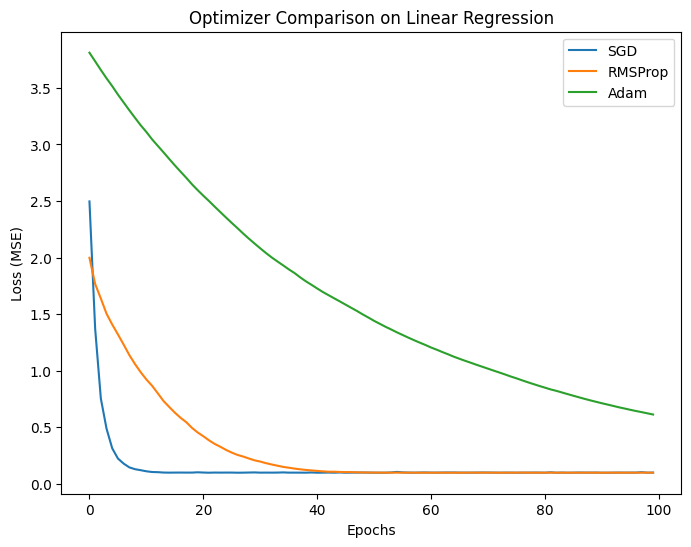

In [5]:
# Gradient Descent Variants Demo (SGD, RMSProp, Adam)
# Colab Ready

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Simple dataset: y = 2x + 1
X = np.linspace(-1, 1, 100)
Y = 2*X + 1 + np.random.randn(*X.shape) * 0.3  # add small noise

# Build a simple linear regression model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(1,))
    ])
    return model

# Different optimizers
optimizers = {
    "SGD": tf.keras.optimizers.SGD(learning_rate=0.1),
    "RMSProp": tf.keras.optimizers.RMSprop(learning_rate=0.01),
    "Adam": tf.keras.optimizers.Adam(learning_rate=0.005)
}

histories = {}

# Train with each optimizer
for name, opt in optimizers.items():
    model = build_model()
    model.compile(optimizer=opt, loss='mse')
    history = model.fit(X, Y, epochs=100, verbose=0)
    histories[name] = history.history['loss']

# Plot loss curves
plt.figure(figsize=(8,6))
for name, loss in histories.items():
    plt.plot(loss, label=name)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Optimizer Comparison on Linear Regression")
plt.legend()
plt.show()